## Observations and Insights 
### 1. Among all Drug Regimens used in this study, Capomulin and Ramicane are two of the most used treatments for tumor, these two are indicated to be most promising treatments for their relative lower tomor volume mean and standard deviation based on statistic summary.
### 2. For mouse m601 treated with Capomulin, with the increase of time, the tumor volume decrease from 45.0mm3 to 28.43mm3, and the tumor volume decrease rapidly in the first 10 days, then decrease gradually over  time.
### 3. For Capomulin regimen, a strong positive correlation can be concluded from the Pearson's correlation coefficient (r=0.84), this can also be observed from the scatter plot and linear regression model

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata, study_results, 
                                  how='outer', on='Mouse ID')
# Display the data table for preview
combined_mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
no_of_mice_of_data = combined_mouse_study_df["Mouse ID"].value_counts()
print(no_of_mice_of_data)
number_of_mice = len(no_of_mice_of_data)
print(f"The number of mice in the raw data based on Mouse ID is {number_of_mice}")

g989    13
e213    10
i557    10
c559    10
a699    10
        ..
n482     1
u153     1
f932     1
b447     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64
The number of mice in the raw data based on Mouse ID is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_mouse_study_df.loc[combined_mouse_study_df.duplicated(subset=
                                                                                    ["Mouse ID", "Timepoint"], keep=False), "Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_data = combined_mouse_study_df.loc[combined_mouse_study_df.duplicated(subset=
                                                                                    ["Mouse ID", "Timepoint"], keep=False), :]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# to get the rows with duplicated mice ID with the below code, 
# combined_mouse_study_df[combined_mouse_study_df["Mouse ID"]==duplicate_mice_ID[0]].index
# and then use drop function to delete data
cleaned_data = combined_mouse_study_df.drop(combined_mouse_study_df[combined_mouse_study_df["Mouse ID"]==duplicate_mice_ID[0]].index)
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
count_data_again = cleaned_data["Mouse ID"].value_counts()
print(count_data_again)
number_of_mice = len(count_data_again)
print(f"The number of mice in the cleaned data based on Mouse ID is {number_of_mice}")

w914    10
e213    10
i557    10
a699    10
c559    10
        ..
b447     1
l872     1
x226     1
x336     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64
The number of mice in the cleaned data based on Mouse ID is 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_vol_mean = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_vol_median = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_variance = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_vol_std = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_vol_sem = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistic_df = pd.DataFrame({
    "Mean": tumor_vol_mean,
    "Median": tumor_vol_median,
    "Variance": tumor_vol_variance,
    "Standard Deviation": tumor_vol_std,
    "SEM": tumor_vol_sem
})

summary_statistic_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_statistic_method2_df = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistic_method2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

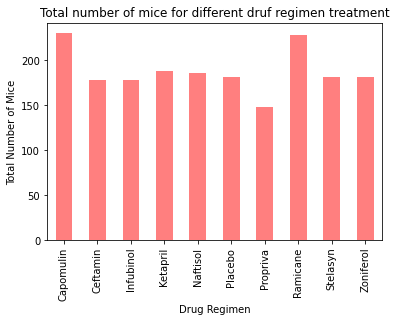

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count_no_mice_for_treatment = cleaned_data.groupby("Drug Regimen")["Mouse ID"].count()
count_bar_chart_pandas = count_no_mice_for_treatment.plot(kind='bar', color="r", alpha=0.5)
count_bar_chart_pandas.set_xlabel("Drug Regimen")
count_bar_chart_pandas.set_ylabel("Total Number of Mice")
count_bar_chart_pandas.set_title("Total number of mice for different druf regimen treatment")
plt.show()
plt.tight_layout()

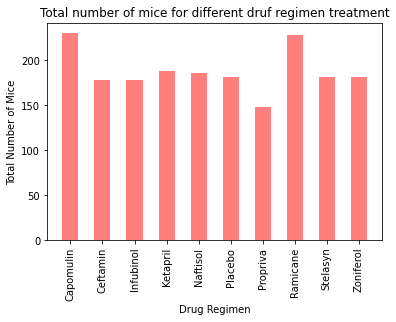

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_regimen = summary_statistic_df.index

bar_x_axis = np.arange(len(count_no_mice_for_treatment))
bar_count_mice = count_no_mice_for_treatment.tolist()

tick_locations = [value for value in bar_x_axis]
plt.xticks(tick_locations, drug_regimen, rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.title("Total number of mice for different druf regimen treatment")

plt.bar(bar_x_axis, bar_count_mice, color="r", alpha=0.5, align="center", width=0.5)

plt.show()
plt.tight_layout()

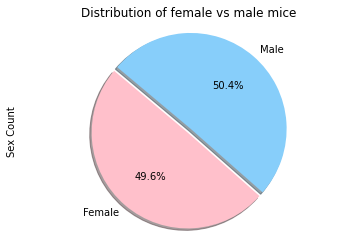

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

group_sex_count = cleaned_data.groupby(["Mouse ID","Sex"]).size()
sex_count_df = pd.DataFrame(group_sex_count).reset_index()
sex_distribution = sex_count_df.groupby("Sex")["Mouse ID"].count()
sex_distribution

colors = ['pink', 'lightskyblue']
explode = (0.05, 0)
sex_pie_chart_pandas = sex_distribution.plot(kind='pie', y='Sex', title="Distribution of female vs male mice",
                                            colors=colors, explode=explode, autopct="%1.1f%%", 
                                            shadow=True, startangle=140)
sex_pie_chart_pandas.set_ylabel("Sex Count")
sex_pie_chart_pandas.axis("equal")
plt.show()

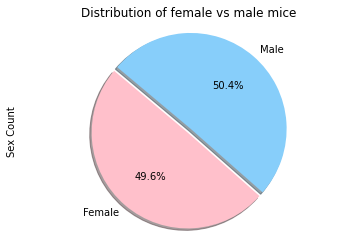

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = sex_distribution.index.tolist()
sex_count_list = sex_distribution.tolist()
colors = ['pink', 'lightskyblue']
explode = (0.05, 0)

plt.pie(sex_count_list, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.ylabel("Sex Count")
plt.title("Distribution of female vs male mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_data_df = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Capomulin"]
Ramicane_data_df = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Ramicane"]
Infubinol_data_df = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Infubinol"]
Ceftamin_data_df = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last_timepoint = Capomulin_data_df.groupby("Mouse ID")["Timepoint"].max()
Capomulin_last_timepoint_df = pd.DataFrame(Capomulin_last_timepoint)

Ramicane_last_timepoint = Ramicane_data_df.groupby("Mouse ID")["Timepoint"].max()
Ramicane_last_timepoint_df = pd.DataFrame(Ramicane_last_timepoint)

Infubinol_last_timepoint = Infubinol_data_df.groupby("Mouse ID")["Timepoint"].max()
Infubinol_last_timepoint_df = pd.DataFrame(Infubinol_last_timepoint)

Ceftamin_last_timepoint = Ceftamin_data_df.groupby("Mouse ID")["Timepoint"].max()
Ceftamin_last_timepoint_df = pd.DataFrame(Ceftamin_last_timepoint)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_final_tumor_vol= pd.merge(Capomulin_last_timepoint_df,cleaned_data,on=("Mouse ID", "Timepoint"),how="left")
Ramicane_final_tumor_vol= pd.merge(Ramicane_last_timepoint_df,cleaned_data,on=("Mouse ID", "Timepoint"),how="left")
Infubinol_final_tumor_vol= pd.merge(Infubinol_last_timepoint_df,cleaned_data,on=("Mouse ID", "Timepoint"),how="left")
Ceftamin_final_tumor_vol= pd.merge(Ceftamin_last_timepoint_df,cleaned_data,on=("Mouse ID", "Timepoint"),how="left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# For Capomulin treatment
Capomulin_tumor_data = Capomulin_final_tumor_vol["Tumor Volume (mm3)"]
quartiles = Capomulin_tumor_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Capomulin treatment is: {lowerq}")
print(f"The upper quartile of tumor volume for Capomulin treatment is: {upperq}")
print(f"The interquartile range of tumor volume for Capomulin treatment is: {iqr}")
print(f"The the median of tumor volume for Capomulin treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Capomulin treatment.")
print(f"Values above {upper_bound} could be outliers for Capomulin treatment.")


The lower quartile of tumor volume for Capomulin treatment is: 32.37735684
The upper quartile of tumor volume for Capomulin treatment is: 40.1592203
The interquartile range of tumor volume for Capomulin treatment is: 7.781863460000004
The the median of tumor volume for Capomulin treatment is: 38.125164399999996 
Values below 20.70456164999999 could be outliers for Capomulin treatment.
Values above 51.83201549 could be outliers for Capomulin treatment.


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# For Ramicane treatment
Ramicane_tumor_data = Ramicane_final_tumor_vol["Tumor Volume (mm3)"]
quartiles = Ramicane_tumor_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Ramicane treatment is: {lowerq}")
print(f"The upper quartile of tumor volume for Ramicane treatment is: {upperq}")
print(f"The interquartile range of tumor volume for Ramicane treatment is: {iqr}")
print(f"The the median of tumor volume for Ramicane treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Ramicane treatment.")
print(f"Values above {upper_bound} could be outliers for Ramicane treatment.")

The lower quartile of tumor volume for Ramicane treatment is: 31.56046955
The upper quartile of tumor volume for Ramicane treatment is: 40.65900627
The interquartile range of tumor volume for Ramicane treatment is: 9.098536719999998
The the median of tumor volume for Ramicane treatment is: 36.56165229 
Values below 17.912664470000003 could be outliers for Ramicane treatment.
Values above 54.30681135 could be outliers for Ramicane treatment.


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# For Infubinol treatment
Infubinol_tumor_data = Infubinol_final_tumor_vol["Tumor Volume (mm3)"]
quartiles = Infubinol_tumor_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Infubinol treatment is: {lowerq}")
print(f"The upper quartile of tumor volume for Infubinol treatment is: {upperq}")
print(f"The interquartile range of tumor volume for Infubinol treatment is: {iqr}")
print(f"The the median of tumor volume for Infubinol treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Infubinol treatment.")
print(f"Values above {upper_bound} could be outliers for Infubinol treatment.")

The lower quartile of tumor volume for Infubinol treatment is: 54.04860769
The upper quartile of tumor volume for Infubinol treatment is: 65.52574285
The interquartile range of tumor volume for Infubinol treatment is: 11.477135160000003
The the median of tumor volume for Infubinol treatment is: 60.16518046 
Values below 36.83290494999999 could be outliers for Infubinol treatment.
Values above 82.74144559000001 could be outliers for Infubinol treatment.


In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# For Ceftamin treatment
Ceftamin_tumor_data = Ceftamin_final_tumor_vol["Tumor Volume (mm3)"]
quartiles = Ceftamin_tumor_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Ceftamin treatment is: {lowerq}")
print(f"The upper quartile of tumor volume for Ceftamin treatment is: {upperq}")
print(f"The interquartile range of tumor volume for Ceftamin treatment is: {iqr}")
print(f"The the median of tumor volume for Ceftamin treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Ceftamin treatment.")
print(f"Values above {upper_bound} could be outliers for Ceftamin treatment.")

The lower quartile of tumor volume for Ceftamin treatment is: 48.72207785
The upper quartile of tumor volume for Ceftamin treatment is: 64.29983003
The interquartile range of tumor volume for Ceftamin treatment is: 15.577752179999997
The the median of tumor volume for Ceftamin treatment is: 59.85195552 
Values below 25.355449580000002 could be outliers for Ceftamin treatment.
Values above 87.66645829999999 could be outliers for Ceftamin treatment.


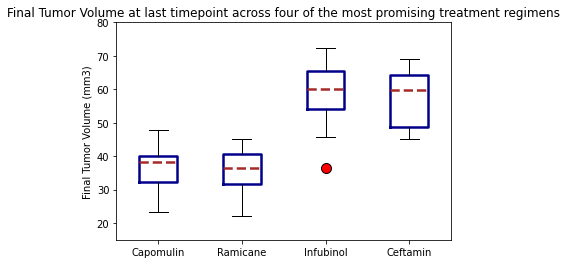

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
tumor_vol_data = [Capomulin_tumor_data, Ramicane_tumor_data, Infubinol_tumor_data, Ceftamin_tumor_data]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume at last timepoint across four of the most promising treatment regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')

boxprops = dict(linestyle='-', linewidth=2.5, color='darkblue')
flierprops = dict(marker='o', markerfacecolor='red', markersize=10,
                  markeredgecolor='black')
medianprops = dict(linestyle='--', linewidth=2.5, color='brown')

ax1.boxplot(tumor_vol_data, labels=treatments, boxprops=boxprops,
            flierprops=flierprops, medianprops=medianprops)
plt.ylim(15, 80)
plt.show()

## Line and Scatter Plots

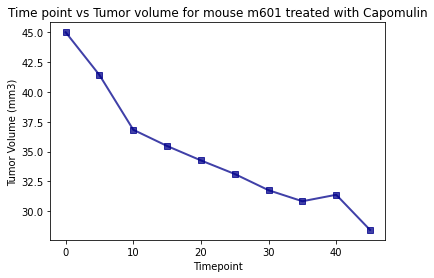

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_last_timepoint_df
# Check Mouse IDs from Capomulin data, choose to plot a line plot for m601
m601_df = cleaned_data.loc[cleaned_data["Mouse ID"]=="m601"]
x_axis = m601_df["Timepoint"]
y_axis = m601_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, linewidth=2, marker='s', color='darkblue', 
        alpha=0.75, label="m601")
plt.title(f"Time point vs Tumor volume for mouse m601 treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

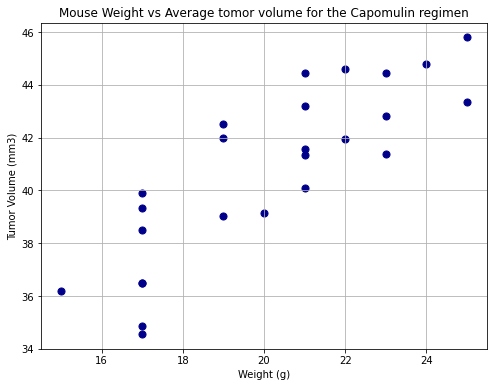

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_avg_tumor_volume = Capomulin_data_df.groupby("Mouse ID").mean()
Capomulin_avg_tumor_volume.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=50,
                                grid=True, color="darkblue", figsize=(8,6),
                                title="Mouse Weight vs Average tomor volume for the Capomulin regimen")
plt.show()

## Correlation and Regression

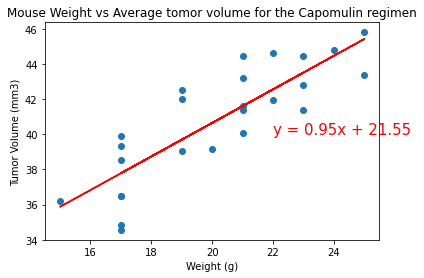

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717


In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight_info = Capomulin_avg_tumor_volume.iloc[:,1]
avg_tumor_info = Capomulin_avg_tumor_volume.iloc[:,3]
correlation = st.pearsonr(weight_info,avg_tumor_info)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_info, avg_tumor_info)
regress_values = weight_info * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_info,avg_tumor_info)
plt.plot(weight_info,regress_values,"r-")
plt.annotate(line_eq,(22,40),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse Weight vs Average tomor volume for the Capomulin regimen")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")